# Run the GP optimizer in four dimensions

In [1]:
%run -i ../../../examples/prepare_gp_optimizer.py

dofs = [kbv.x_rot, kbv.offz, kbh.x_rot, kbh.offz]

hard_bounds = np.array([[-0.10, +0.10], [-0.50, +0.50], [-0.10, +0.10], [-0.50, +0.50]])

for dof in dofs:
    dof.kind = "hinted"

In [2]:
gpo = Optimizer(
    init_scheme='quasi-random', 
    n_init=16, 
    run_engine=RE, 
    db=db, 
    detector=w9, 
    detector_type='image',
    dofs=dofs, 
    dof_bounds=hard_bounds, 
    fitness_model='max_sep_density',
    training_iter=100, 
    verbose=True,
)

learning with strategy "quasi-random" ...


    kbv_x_rot  kbv_offz  kbh_x_rot  kbh_offz    fitness
0    0.045292  0.145478  -0.084438  0.288649   6.699793
1   -0.054708  0.256589   0.011562  0.145792   9.411997
2    0.095292 -0.410077  -0.028438 -0.201147        NaN
3   -0.004708 -0.076744   0.091562 -0.058290   5.882022
4    0.020292  0.367700   0.051562 -0.344004   6.997097
5   -0.079708 -0.298966  -0.068438  0.370281   7.357270
6    0.070292  0.034367   0.019562 -0.486861   8.853263
7   -0.029708  0.404738  -0.020438  0.227424   9.313653
8    0.032792 -0.261929   0.099562  0.084567   5.538311
9   -0.067208  0.071404   0.059562 -0.180739   6.673862
10   0.082792  0.182515  -0.060438 -0.037882   6.714378
11  -0.017208 -0.484151  -0.012438 -0.323596  10.016827
12   0.007792 -0.150818  -0.052438  0.390690   7.701666
13  -0.092208  0.293626   0.067562 -0.466453   7.512032
14   0.057792 -0.373040   0.027562  0.247832   7.813410
15  -0.042208 -0.039707  -0.092438  0.104975   6.195736


With four dimensions, we can no longer plot the parameter space in a satisfying way as we might be able to in two dimensions. We also have a lot more hyperparameters to deal with, and comparatively fewer points per dimension with which to infer them. One way to evaluate the state of the hyperparameters is with the Fisher information matrix, which encodes the covariance of their estimates with respect to the likelihood:

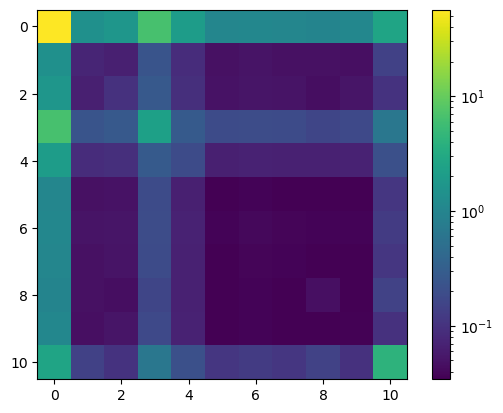

In [3]:
FM = gpo._contingent_fisher_information_matrix(gpo.test_params[0])[0]
plt.imshow(np.abs(FM), norm=mpl.colors.LogNorm())
plt.colorbar()

In particular, we can use the information matrix to sample points which will tell us the most about the hyperparameters:

In [4]:
gpo.learn(n_iter=1, n_per_iter=1, strategy='A-optimal', greedy=True, reuse_hypers=False)
gpo.learn(n_iter=1, n_per_iter=1, strategy='D-optimal', greedy=True, reuse_hypers=False)

learning with strategy "A-optimal" ...


    kbv_x_rot  kbv_offz  kbh_x_rot  kbh_offz   fitness
16   0.023979  0.021548  -0.078097  0.079301  6.375765
learning with strategy "D-optimal" ...


    kbv_x_rot  kbv_offz  kbh_x_rot  kbh_offz   fitness
17  -0.016008  0.213717   0.049243 -0.262796  7.292132


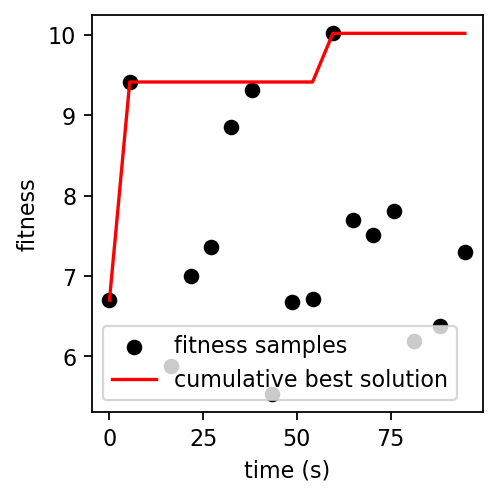

In [5]:
gpo.plot_fitness()